<Figure size 432x288 with 0 Axes>

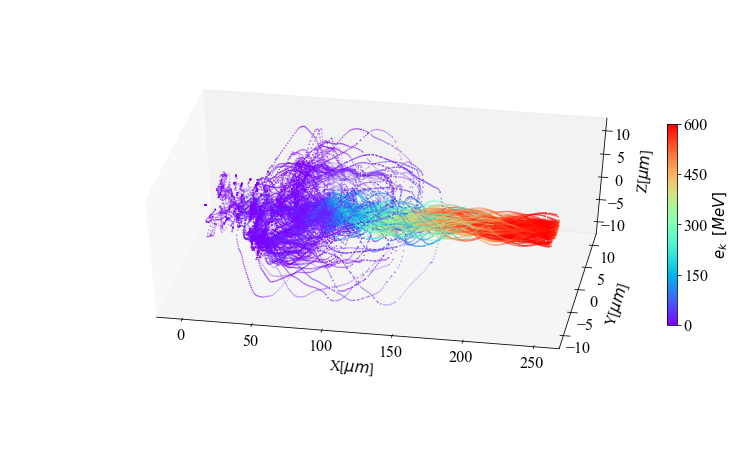

In [4]:

import matplotlib.pyplot as plt
import matplotlib
from matplotlib import cm
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib import pyplot as plt

plt.rc('font',family='Times New Roman')



xx=np.loadtxt('data/xx.txt')/1e-6
yy=np.loadtxt('data/yy.txt')/1e-6
zz=np.loadtxt('data/zz.txt')/1e-6
ek=np.loadtxt('data/ek.txt')

#from matplotlib import animation
def reg_cmap_transparent(iname,alpha):
    oname = iname + '_transparent'
    cmap = plt.get_cmap(iname)
    values = np.linspace(0,1,256)
    colors = cmap(values)
    for i in range(256):
        colors[i][3] = alpha[i]
    colorlist = [(values[i],colors[i]) for i in range(256)]
    cmap = plt.cm.colors.LinearSegmentedColormap.from_list(oname,colorlist)
    plt.cm.register_cmap(cmap=cmap)
    return cmap

def create_alpha(func):
    return [ 1 if func(i)>1 else 0 if func(i)<0 else func(i) for i in range(256)]
'''
font = {'fontname':"Times New Roman Bold",
        'family' : 'monospace',  
        'color'  : 'black',  
        'weight' : 'normal',  
        'size'   : 15,  
        }  
'''
font = {
        'family' : 'Times New Roman',  
        'color'  : 'black',  
        'weight' : 'normal',  
        'size'   : 15,  
        }  
color='hsv'
index = 1
plt.set_cmap(reg_cmap_transparent(color,create_alpha(lambda x:(1-abs(x/127.5-1)**index))))
cmap = plt.get_cmap()

name='${e_k}$  '
font_size = 20
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111,projection='3d')
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([12,8,8,12]))
ax.view_init(45,-80)

'''
x=a[:,1]/1e-6
y=a[:,2]/1e-6
z=a[:,3]/1e-6
color=a[:,0]

im=ax.scatter(x[color>450],y[color>450],z[color>450],s=0.1,c=color[color>450],cmap=cmap)
'''

for i in range(11,300):
    im=ax.scatter(xx[:,i],yy[:,i],zz[:,i],s=0.2,c=ek[:,i],cmap=cm.rainbow)
    #im=ax.plot(xx[:,i],yy[:,i],zz[:,i],c=ek[:,i],cmap=cm.rainbow)
#im=ax.plot(xx[:,0],yy[:,0],zz[:,0],c=ek[:,0])#,cmap=cmap)

cbar=plt.colorbar(im,ticks=np.linspace(0, 600,5),fraction=0.015,pad=-0.1)#,ticks=np.linspace(450, 650, 5),fraction=0.015,pad=-0.2)
cbar.set_label(name+r'$[MeV]$',fontdict=font)
cbar.ax.tick_params(labelsize=16)
im.set_clim([0,600])
ax.set_xlabel('\n\nX'+ '[$\mu m$]',fontdict=font)
ax.set_ylabel('\nY'+ '[$\mu m$]',fontdict=font)
ax.set_zlabel('\nZ'+ '[$\mu m$]',fontdict=font)
plt.tick_params(labelsize=16)
labels = ax.get_xticklabels() + ax.get_yticklabels() + ax.get_zticklabels()
[label.set_fontname('Times New Roman') for label in labels]

# Hide grid lines 
#ax.grid(True)
ax.grid(linestyle=":",color="r")

fig.savefig('3d0_2.png',dpi=1000,bbox_inches = 'tight')
#def rotate(angle): 
#   ax.view_init(azim=angle) 
#rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0,362,2),interval=100) 
#rot_animation.save('rotation.gif', dpi=80, writer='imagemagick') 



In [1]:
import matplotlib
matplotlib.rcParams['font.family'] = 'sans-serif'  
matplotlib.rcParams['font.sans-serif'] = 'NSimSun,Times New Roman'# 中文设置成宋体，除此之外的字体设置成New Roman  

In [17]:
import sdf

In [16]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import cm
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib import pyplot as plt
plt.figure(figsize=[15,8])
plt.scatter(X, Y, label = 'RealValue')
plt.plot(X, func(X, a, b), 'red', label = 'CurveLine')
plt.title(station, fontdict={'family' : 'Times New Roman', 'size'   : 16})
plt.ylabel('Clocks($\mu S$)', fontdict={'family' : 'Times New Roman', 'size'   : 16})
plt.xlabel('Time', fontdict={'family' : 'Times New Roman', 'size'   : 16})
plt.yticks(fontproperties = 'Times New Roman', size = 14)
plt.xticks(fontproperties = 'Times New Roman', size = 14)
plt.legend(prop={'family' : 'Times New Roman', 'size'   : 16})
plt.savefig('./stationClocks/' + station + '.ps', dpi = 200)
plt.show()



NameError: name 'X' is not defined

<Figure size 1080x576 with 0 Axes>

In [12]:
import numpy as np
np.linspace(0, 600, 5)


array([  0., 150., 300., 450., 600.])

In [6]:
import numpy as np
ek=np.loadtxt('data/ek.txt')
ek.max()

637.09374

In [ ]:
import imageio

In [ ]:
image_list=['a.png','b.png']
def create_gif(image_list, gif_name, duration = 0.5):
    '''
    '''
    frames = []
    #for image_name in image_list:
        #frames.append(imageio.imread(image_name))

    #imageio.mimsave(gif_name, frames, 'GIF', duration=duration)

    pool = ThreadPool()
    frames = pool.map(imageio.imread,image_list)
    imageio.mimsave(gif_name, frames, 'GIF', duration=duration)
    pool.close()
    pool.join()
    return

def main():
    #image_list = ['1.jpg', '2.jpg', '3.jpg']
    gif_name = "gif/"+"density_"+const.name+".gif"
    duration = 0.1
    create_gif(image_list, gif_name, duration)